<a href="https://colab.research.google.com/github/avisinghal6/Double_Descent/blob/main/double_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import RidgeClassifier, SGDClassifier

In [2]:
def get_data(n_train_samples=10000):
    # Retrieve MNIST dataset from Tensorflow Keras datasets
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    
    # Select 10000 random samples from x_train
    np.random.seed(1)
    indices = list(range(x_train.shape[0]))
    np.random.shuffle(indices)
    train_idx = indices[:n_train_samples]
    x_train = x_train[train_idx].reshape(n_train_samples, -1)
    y_train = y_train[train_idx]
    x_test = x_test.reshape(x_test.shape[0], -1)
    
    # Normalize data
    x_train.astype(np.float32)
    x_test.astype(np.float32)
    x_train = np.multiply(x_train, 1.0/255)
    x_test = np.multiply(x_test, 1.0/255)
    
    return x_train, y_train, x_test, y_test

In [3]:
def generate_synthetic_data(x, r1, r2):
    # Perform the operation to generate synthetic data
    o = np.dot(x, r1) ** 2 + np.dot(x, r2) ** 2  # real and complex part
    return o

In [4]:
def fit_ridge_classifier(x_train, y_train, x_test, y_test, alpha=0.001):
    # Fit a Ridge Classifier
    clf = RidgeClassifier(alpha=alpha)
    clf.fit(x_train, y_train.ravel())
    
    # Evaluate prediction accuracy on training and test data
    train_accuracy = clf.score(x_train, y_train)
    test_accuracy = clf.score(x_test, y_test)
    return train_accuracy, test_accuracy

In [5]:
# Get Data

x_train, y_train, x_test, y_test = get_data()

11490434/11490434 [==============================] - 1s 0us/step


In [6]:
# Run experiments

train_acc_list = []
test_acc_list = []

feature_size_list = sorted([1000 * k for k in range(1, 16)] + [250, 500, 1500, 2500, 9500, 10500, 17500, 20000, 22500, 25000, 27500, 30000])

for num_feature in feature_size_list:
    dim = 28 * 28
    R1 = np.random.randn(dim, num_feature) / np.sqrt(num_feature)
    R2 = np.random.randn(dim, num_feature) / np.sqrt(num_feature)
    x_train_synthetic = generate_synthetic_data(x_train, R1, R2)
    x_test_synthetic = generate_synthetic_data(x_test, R1, R2)
    train_accuracy, test_accuracy = fit_ridge_classifier(x_train_synthetic, y_train, x_test_synthetic, y_test)
    train_acc_list.append(train_accuracy)
    test_acc_list.append(test_accuracy)
    print ("Number of features: %d. Training accuracy: %.3f. Test accuracy: %.3f" % (num_feature, train_accuracy, test_accuracy))

Number of features: 250. Training accuracy: 0.894. Test accuracy: 0.883
Number of features: 500. Training accuracy: 0.935. Test accuracy: 0.917
Number of features: 1000. Training accuracy: 0.966. Test accuracy: 0.937
Number of features: 1500. Training accuracy: 0.978. Test accuracy: 0.948
Number of features: 2000. Training accuracy: 0.986. Test accuracy: 0.950
Number of features: 2500. Training accuracy: 0.992. Test accuracy: 0.949
Number of features: 3000. Training accuracy: 0.995. Test accuracy: 0.950
Number of features: 4000. Training accuracy: 0.998. Test accuracy: 0.942
Number of features: 5000. Training accuracy: 1.000. Test accuracy: 0.934
Number of features: 6000. Training accuracy: 1.000. Test accuracy: 0.923
Number of features: 7000. Training accuracy: 1.000. Test accuracy: 0.898
Number of features: 8000. Training accuracy: 1.000. Test accuracy: 0.868
Number of features: 9000. Training accuracy: 1.000. Test accuracy: 0.848
Number of features: 9500. Training accuracy: 1.000. T

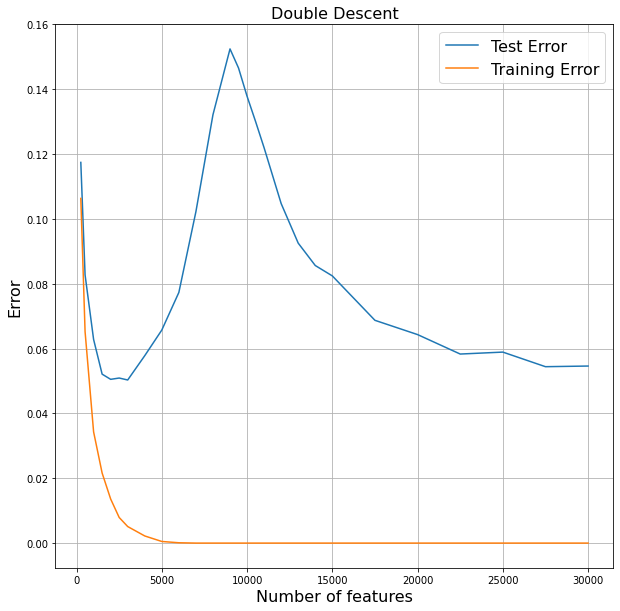

In [7]:
# Plot Train and Test Error

plt.figure(figsize=(10, 10))
plt.plot(feature_size_list, 1-np.array(test_acc_list), label = "Test Error")
plt.plot(feature_size_list, 1-np.array(train_acc_list), label = "Training Error")
plt.xlabel('Number of features', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.title('Double Descent', fontsize=16)
plt.grid()
plt.legend(fontsize='16')
plt.show()

In [ ]:
def fit_logistic_regression(x_train, y_train, x_test, y_test):
  # Fit a Logistic Regression
  clf = SGDClassifier().fit(x_train, y_train)
  clf.fit(x_train, y_train.ravel())
  
  # Evaluate prediction accuracy on training and test data
  train_accuracy = clf.score(x_train, y_train)
  test_accuracy = clf.score(x_test, y_test)
  return train_accuracy, test_accuracy

In [ ]:
# Run experiments

train_acc_list = []
test_acc_list = []

feature_size_list = sorted([1000 * k for k in range(1, 16)] + [250, 500, 1500, 2500, 9500, 10500, 17500, 20000, 22500, 25000, 27500, 30000])

for num_feature in feature_size_list:
    dim = 28 * 28
    R1 = np.random.randn(dim, num_feature) / np.sqrt(num_feature)
    R2 = np.random.randn(dim, num_feature) / np.sqrt(num_feature)
    x_train_synthetic = generate_synthetic_data(x_train, R1, R2)
    x_test_synthetic = generate_synthetic_data(x_test, R1, R2)
    train_accuracy, test_accuracy = fit_logistic_regression(x_train_synthetic, y_train, x_test_synthetic, y_test)
    train_acc_list.append(train_accuracy)
    test_acc_list.append(test_accuracy)
    print ("Number of features: %d. Training accuracy: %.3f. Test accuracy: %.3f" % (num_feature, train_accuracy, test_accuracy))

Number of features: 250. Training accuracy: 0.929. Test accuracy: 0.893
Number of features: 500. Training accuracy: 0.977. Test accuracy: 0.923
Number of features: 1000. Training accuracy: 0.994. Test accuracy: 0.949
Number of features: 1500. Training accuracy: 0.996. Test accuracy: 0.955
Number of features: 2000. Training accuracy: 0.996. Test accuracy: 0.955
Number of features: 2500. Training accuracy: 0.997. Test accuracy: 0.959
Number of features: 3000. Training accuracy: 0.994. Test accuracy: 0.957
Number of features: 4000. Training accuracy: 0.993. Test accuracy: 0.955
Number of features: 5000. Training accuracy: 0.994. Test accuracy: 0.963
Number of features: 6000. Training accuracy: 0.993. Test accuracy: 0.965
Number of features: 7000. Training accuracy: 0.989. Test accuracy: 0.960
Number of features: 8000. Training accuracy: 0.988. Test accuracy: 0.958
Number of features: 9000. Training accuracy: 0.989. Test accuracy: 0.962
Number of features: 9500. Training accuracy: 0.988. T

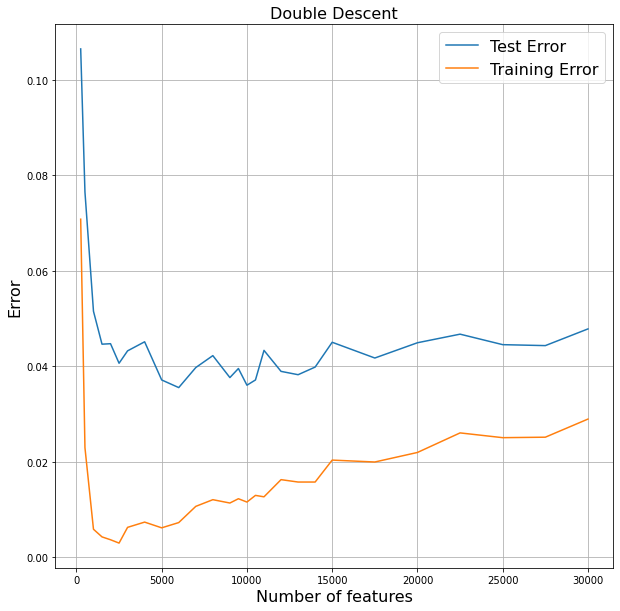

In [ ]:
# Plot Train and Test Error

plt.figure(figsize=(10, 10))
plt.plot(feature_size_list, 1-np.array(test_acc_list), label = "Test Error")
plt.plot(feature_size_list, 1-np.array(train_acc_list), label = "Training Error")
plt.xlabel('Number of features', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.title('Double Descent', fontsize=16)
plt.grid()
plt.legend(fontsize='16')
plt.show()

In [ ]:
from   sklearn.exceptions import NotFittedError
from sklearn.linear_model import SGDClassifier
import numpy as np
class RFFSGD:

    def __init__(self, alpha=1,rff_dim=1,sigma=1):
        """Kernel ridge regression using random Fourier features.
        rff_dim : Dimension of random feature.
  
        """
        self.fitted  = False
        self.rff_dim = rff_dim
        self.lm      = RidgeClassifier(alpha=alpha)
        self.b_      = None
        self.W_      = None
        self.alpha    = alpha

    def fit(self, X, y):
        """Fit model with training data X and target y.
        """
        Z, W, b = self._get_rffs(X, return_vars=True)
        self.lm.fit(Z, y.ravel())
        self.b_ = b
        self.W_ = W
        self.fitted = True
        return self

    def predict(self, X):
        """Predict using fitted model and testing data X.
        """
        if not self.fitted:
            msg = "Call 'fit' with appropriate arguments first."
            raise NotFittedError(msg)
        Z = self._get_rffs(X, return_vars=False)
        return self.lm.predict(Z)
    
    def score(self,x_train,y_train,x_test,y_test):
        """Return train and test accuracy
        """
        x_train_transform=self._get_rffs(x_train,False)
        x_test_transform=self._get_rffs(x_test,False)
        train_accuracy = self.lm.score(x_train_transform, y_train)
        test_accuracy = self.lm.score(x_test_transform, y_test)
        return train_accuracy, test_accuracy


    def _get_rffs(self, X, return_vars):
        """Return random Fourier features based on data X, as well as random
        variables W and b. Using Cauchy Kernel which has Laplace as its fourier transform which I use for sampling.
        """
        N, D = X.shape
        if self.W_ is not None:
            W, b = self.W_, self.b_
        else:
            W = np.random.laplace(0,1,size=(self.rff_dim, D))
            b = np.random.uniform(0, 2*np.pi, size=self.rff_dim)

        B    = np.repeat(b[np.newaxis,:], N, axis=0)
        # print(B.shape)
        norm = 1./ np.sqrt(self.rff_dim)
        Z    = norm * np.sqrt(2) * np.cos( W @ X.T + B.T)
        Z=Z.T
        if return_vars:
            return Z, W, b
        return Z

In [ ]:
# Run experiments

train_acc_list = []
test_acc_list = []

feature_size_list = sorted([1000 * k for k in range(1, 16)] + [250, 500, 1500, 2500, 9500, 10500, 17500, 20000, 22500, 25000, 27500, 30000])

for num_feature in feature_size_list:
    dim = 28 * 28
    model=RFFSGD(num_feature)
    model.fit(x_train,y_train)
    train_accuracy, test_accuracy = model.score(x_train,y_train,x_test,y_test)
    train_acc_list.append(train_accuracy)
    test_acc_list.append(test_accuracy)
    print ("Number of features: %d. Training accuracy: %.3f. Test accuracy: %.3f" % (num_feature, train_accuracy, test_accuracy))

Number of features: 250. Training accuracy: 0.130. Test accuracy: 0.101
Number of features: 500. Training accuracy: 0.143. Test accuracy: 0.103
Number of features: 1000. Training accuracy: 0.306. Test accuracy: 0.106
Number of features: 1500. Training accuracy: 0.452. Test accuracy: 0.105
Number of features: 2000. Training accuracy: 0.516. Test accuracy: 0.102
Number of features: 2500. Training accuracy: 0.631. Test accuracy: 0.110
Number of features: 3000. Training accuracy: 0.687. Test accuracy: 0.109
Number of features: 4000. Training accuracy: 0.778. Test accuracy: 0.112
Number of features: 5000. Training accuracy: 0.850. Test accuracy: 0.110
Number of features: 6000. Training accuracy: 0.902. Test accuracy: 0.115
Number of features: 7000. Training accuracy: 0.926. Test accuracy: 0.112
Number of features: 8000. Training accuracy: 0.957. Test accuracy: 0.114
Number of features: 9000. Training accuracy: 0.970. Test accuracy: 0.112
Number of features: 9500. Training accuracy: 0.978. T

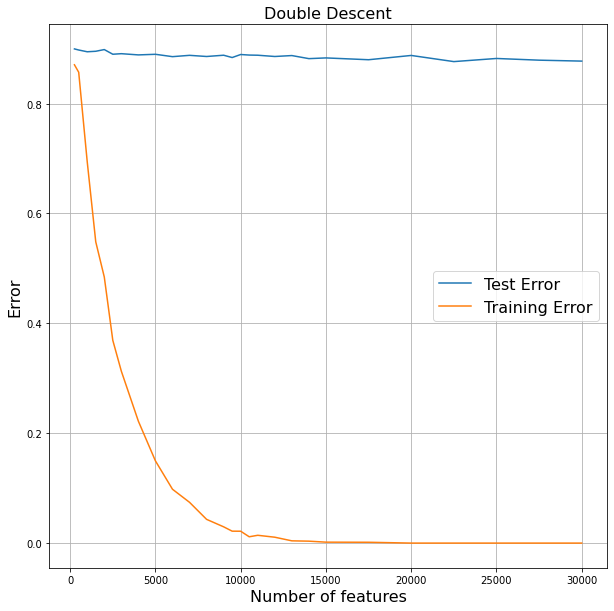

In [ ]:
# Plot Train and Test Error

plt.figure(figsize=(10, 10))
plt.plot(feature_size_list, 1-np.array(test_acc_list), label = "Test Error")
plt.plot(feature_size_list, 1-np.array(train_acc_list), label = "Training Error")
plt.xlabel('Number of features', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.title('Double Descent', fontsize=16)
plt.grid()
plt.legend(fontsize='16')
plt.show()

In [ ]:
# Run experiments

train_acc_list = []
test_acc_list = []

feature_size_list = sorted([1000 * k for k in range(1, 16)] + [250, 500, 1500, 2500, 9500, 10500, 17500, 20000, 22500, 25000, 27500, 30000])

for num_feature in feature_size_list:
    dim = 28 * 28
    model=RFFSGD(0.001,num_feature)
    model.fit(x_train,y_train)
    train_accuracy, test_accuracy = model.score(x_train,y_train,x_test,y_test)
    train_acc_list.append(train_accuracy)
    test_acc_list.append(test_accuracy)
    print ("Number of features: %d. Training accuracy: %.3f. Test accuracy: %.3f" % (num_feature, train_accuracy, test_accuracy))

Number of features: 250. Training accuracy: 0.205. Test accuracy: 0.106
Number of features: 500. Training accuracy: 0.262. Test accuracy: 0.102
Number of features: 1000. Training accuracy: 0.365. Test accuracy: 0.103
Number of features: 1500. Training accuracy: 0.450. Test accuracy: 0.110
Number of features: 2000. Training accuracy: 0.538. Test accuracy: 0.112
Number of features: 2500. Training accuracy: 0.623. Test accuracy: 0.109
Number of features: 3000. Training accuracy: 0.709. Test accuracy: 0.106
Number of features: 4000. Training accuracy: 0.836. Test accuracy: 0.111
Number of features: 5000. Training accuracy: 0.924. Test accuracy: 0.105
Number of features: 6000. Training accuracy: 0.980. Test accuracy: 0.107
Number of features: 7000. Training accuracy: 0.997. Test accuracy: 0.110
Number of features: 8000. Training accuracy: 1.000. Test accuracy: 0.105
Number of features: 9000. Training accuracy: 1.000. Test accuracy: 0.100
Number of features: 9500. Training accuracy: 1.000. T

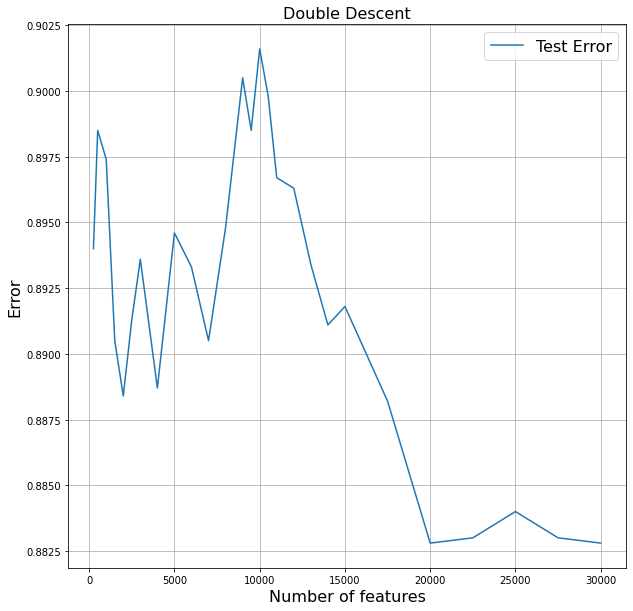

In [ ]:
# Plot Train and Test Error

plt.figure(figsize=(10, 10))
plt.plot(feature_size_list, 1-np.array(test_acc_list), label = "Test Error")
plt.xlabel('Number of features', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.title('Double Descent', fontsize=16)
plt.grid()
plt.legend(fontsize='16')
plt.show()

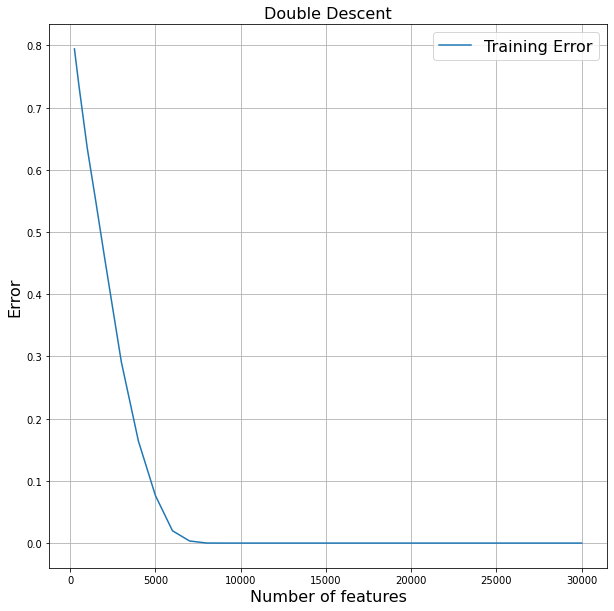

In [ ]:
# Plot Train and Test Error

plt.figure(figsize=(10, 10))
plt.plot(feature_size_list, 1-np.array(train_acc_list), label = "Training Error")
plt.xlabel('Number of features', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.title('Double Descent', fontsize=16)
plt.grid()
plt.legend(fontsize='16')
plt.show()